<a href="https://colab.research.google.com/github/kwanglo/personal_projects/blob/master/r_visual/final_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(dplyr)    # alternatively, this also loads %>%
library(ggplot2) 
library(ggcorrplot) 
library(lme4)
library(lmerTest)
library(ez)
library("readxl")
library(ggpubr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
Loading required package: magrittr


In [ ]:
library(gridExtra)
library(grid)
library(lattice)


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [ ]:
demographics = read.csv("EDA_Skeleton/DATA/DEMO_I_preprocessed.csv")
bodymeasure = read.csv("EDA_Skeleton/DATA/BMX_I_preprocessed.csv")
dietary = read.csv("EDA_Skeleton/DATA/DBQ_I_preprocessed.csv")
physical = read.csv("EDA_Skeleton/DATA/PAQ_I_preprocessed.csv")
depression = read.csv("EDA_Skeleton/DATA/DPQ_I_preprocessed.csv")
sleep = read.csv("EDA_Skeleton/DATA/SLQ_I_preprocessed.csv")
whistory = read.csv("EDA_Skeleton/DATA/WHQ_I_preprocessed.csv")

In [ ]:
head(demographics)

,RIAGENDR,RIDEXPRG,RIDAGEYR,SEQN,Age_cate
,<int>,<int>,<int>,<int>,<int>
1,1,NA,62,83732,6
2,1,NA,53,83733,5
3,1,NA,78,83734,7
4,2,NA,56,83735,5
5,2,1,42,83736,4
6,2,NA,72,83737,7


In [ ]:
demo_bmx <- merge(demographics, bodymeasure, by="SEQN")
demo_dbq <- merge(demographics, dietary, by="SEQN")
demo_paq <- merge(demographics, physical, by="SEQN")
demo_dpq <- merge(demographics, depression, by="SEQN")
demo_slq <- merge(demographics, sleep, by="SEQN")
demo_whq <- merge(demographics, whistory, by="SEQN")

In [ ]:
head(demo_bmx)

,SEQN,RIAGENDR,RIDEXPRG,RIDAGEYR,Age_cate,BMIHT,BMXHT,BMIWAIST,BMXWAIST,BMXBMI,BMIWT,BMXWT,BMI_cate
,<int>,<int>,<int>,<int>,<int>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,83732,1,NA,62,6,NA,184.5,NA,101.1,27.8,NA,94.8,1
2,83733,1,NA,53,5,NA,171.4,NA,107.9,30.8,NA,90.4,2
3,83734,1,NA,78,7,NA,170.1,NA,116.5,28.8,NA,83.4,1
4,83735,2,NA,56,5,NA,160.9,NA,110.1,42.4,NA,109.8,2
5,83736,2,1,42,4,NA,164.9,NA,80.4,20.3,NA,55.2,0
6,83737,2,NA,72,7,NA,150.0,NA,92.9,28.6,NA,64.4,1


In [ ]:
names <- c('RIAGENDR' ,'Age_cate', 'BMI_cate')
demo_bmx[,names] <- lapply(demo_bmx[,names] , factor)
str(demo_bmx)

'data.frame':	8985 obs. of  13 variables:
 $ SEQN    : int  83732 83733 83734 83735 83736 83737 83738 83739 83740 83741 ...
 $ RIAGENDR: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 1 1 1 ...
 $ RIDEXPRG: int  NA NA NA NA 1 NA NA NA NA NA ...
 $ RIDAGEYR: int  62 53 78 56 42 72 11 4 1 22 ...
 $ Age_cate: Factor w/ 9 levels "0","1","2","3",..: 7 6 8 6 5 8 2 1 1 3 ...
 $ BMIHT   : logi  NA NA NA NA NA NA ...
 $ BMXHT   : num  184 171 170 161 165 ...
 $ BMIWAIST: logi  NA NA NA NA NA NA ...
 $ BMXWAIST: num  101.1 107.9 116.5 110.1 80.4 ...
 $ BMXBMI  : num  27.8 30.8 28.8 42.4 20.3 28.6 18.1 15.7 NA 28 ...
 $ BMIWT   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ BMXWT   : num  94.8 90.4 83.4 109.8 55.2 ...
 $ BMI_cate: Factor w/ 3 levels "0","1","2": 2 3 2 3 1 2 1 1 NA 2 ...


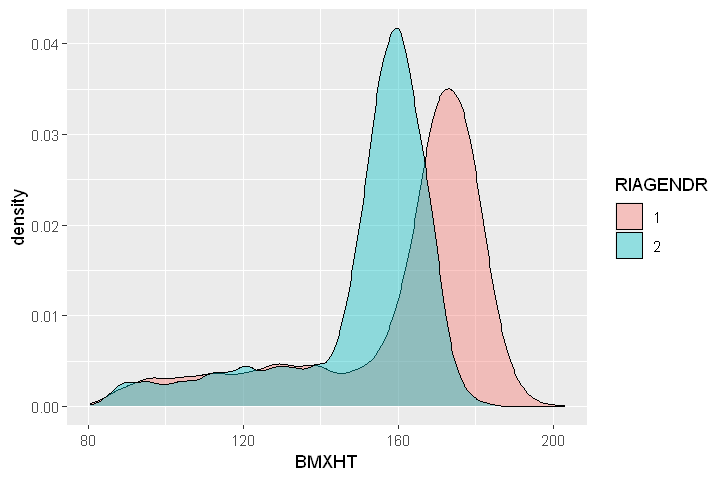

In [ ]:
# Height
options(repr.plot.width=6, repr.plot.height=4)

temp <-subset(demo_bmx, !is.na(BMXHT))
p <- ggplot(temp, aes(x=BMXHT, fill=RIAGENDR)) + geom_density(alpha=0.4)
p

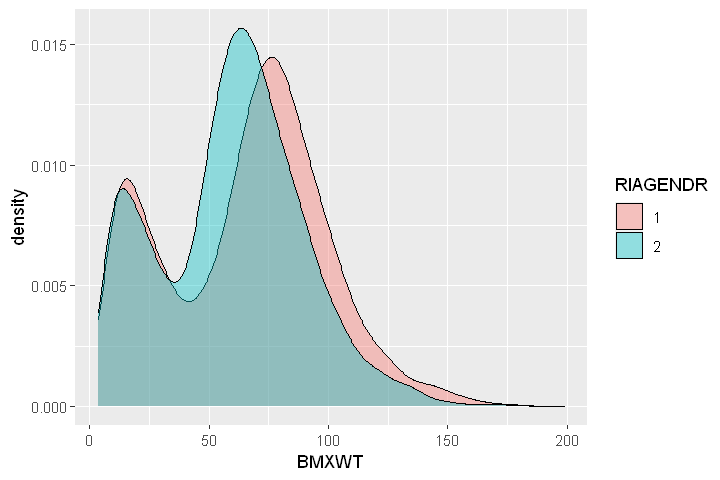

In [ ]:
# Weight
options(repr.plot.width=6, repr.plot.height=4)

temp <-subset(demo_bmx, !is.na(BMXWT))
p <- ggplot(temp, aes(x=BMXWT, fill=RIAGENDR)) + geom_density(alpha=0.4)
p

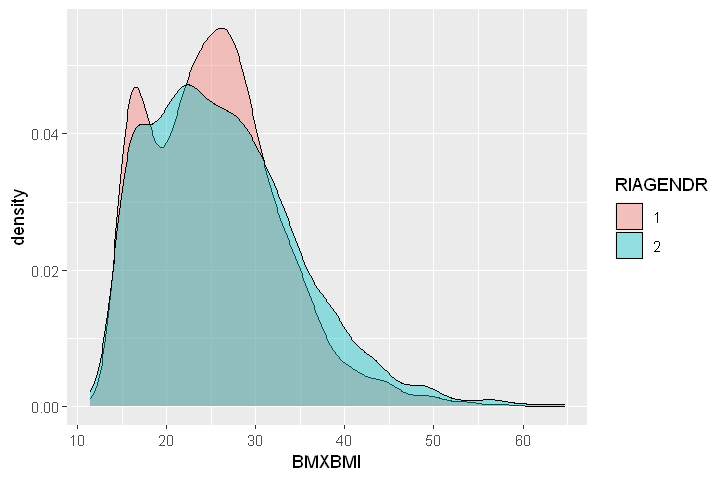

In [ ]:
# Weight
options(repr.plot.width=6, repr.plot.height=4)

temp <-subset(demo_bmx, !is.na(BMXBMI))
p <- ggplot(temp, aes(x=BMXBMI, fill=RIAGENDR)) + geom_density(alpha=0.4)
p

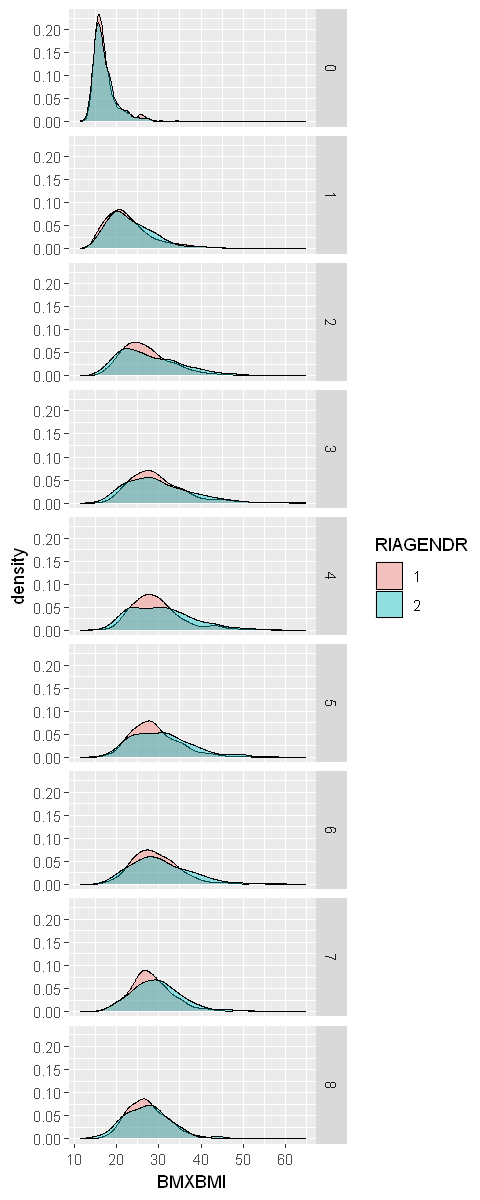

In [ ]:
# Weight
options(repr.plot.width=4, repr.plot.height=10)

temp <-subset(demo_bmx, !is.na(BMXBMI))

p <- ggplot(temp, aes(x=BMXBMI, fill=RIAGENDR)) + 
geom_density(alpha=0.4) +
facet_grid(Age_cate ~ .)
p


In [ ]:
#Split violing plot
GeomSplitViolin <- ggproto("GeomSplitViolin", GeomViolin, 
                           draw_group = function(self, data, ..., draw_quantiles = NULL) {
  data <- transform(data, xminv = x - violinwidth * (x - xmin), xmaxv = x + violinwidth * (xmax - x))
  grp <- data[1, "group"]
  newdata <- plyr::arrange(transform(data, x = if (grp %% 2 == 1) xminv else xmaxv), if (grp %% 2 == 1) y else -y)
  newdata <- rbind(newdata[1, ], newdata, newdata[nrow(newdata), ], newdata[1, ])
  newdata[c(1, nrow(newdata) - 1, nrow(newdata)), "x"] <- round(newdata[1, "x"])

  if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {
    stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <=
      1))
    quantiles <- ggplot2:::create_quantile_segment_frame(data, draw_quantiles)
    aesthetics <- data[rep(1, nrow(quantiles)), setdiff(names(data), c("x", "y")), drop = FALSE]
    aesthetics$alpha <- rep(1, nrow(quantiles))
    both <- cbind(quantiles, aesthetics)
    quantile_grob <- GeomPath$draw_panel(both, ...)
    ggplot2:::ggname("geom_split_violin", grid::grobTree(GeomPolygon$draw_panel(newdata, ...), quantile_grob))
  }
  else {
    ggplot2:::ggname("geom_split_violin", GeomPolygon$draw_panel(newdata, ...))
  }
})

geom_split_violin <- function(mapping = NULL, data = NULL, stat = "ydensity", position = "identity", ..., 
                              draw_quantiles = NULL, trim = TRUE, scale = "area", na.rm = FALSE, 
                              show.legend = NA, inherit.aes = TRUE) {
  layer(data = data, mapping = mapping, stat = stat, geom = GeomSplitViolin, 
        position = position, show.legend = show.legend, inherit.aes = inherit.aes, 
        params = list(trim = trim, scale = scale, draw_quantiles = draw_quantiles, na.rm = na.rm, ...))
}

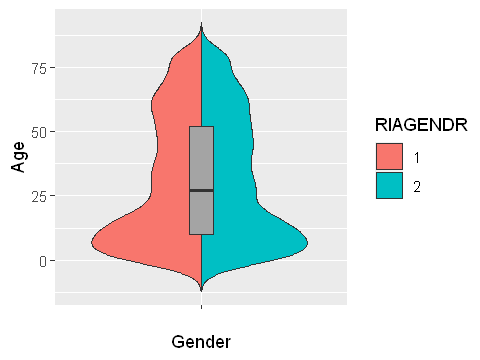

In [ ]:
#바이올린 플롯으로 성별에 따른 나이분포
options(repr.plot.width=4, repr.plot.height=3)

x_rand = c(rep(' ',length(demo_bmx$RIDAGEYR)))

temp <-subset(demo_bmx, !is.na(RIDAGEYR))
p <- ggplot(demo_bmx, aes(x = x_rand, y= RIDAGEYR, fill= RIAGENDR)) + 
geom_split_violin(trim=FALSE) +
labs(x="Gender", y="Age")

p + geom_boxplot(width=0.1, fill='#A4A4A4')

Warning message:
"Removed 740 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 740 rows containing non-finite values (stat_boxplot)."

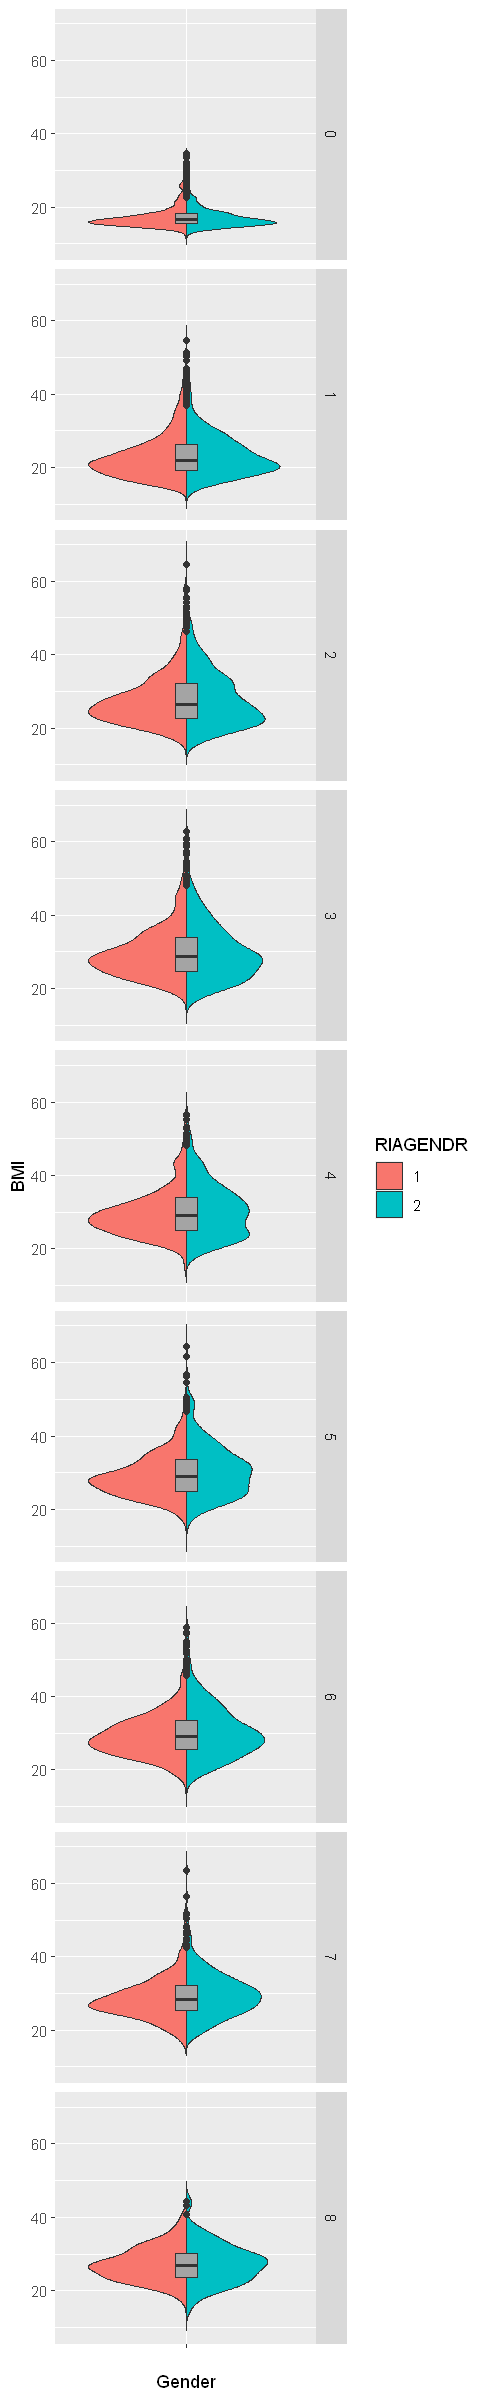

In [ ]:
#바이올린 플롯으로 Age group에 따른 BMI 분포 확인
options(repr.plot.width=4, repr.plot.height=20)

x_rand = c(rep(' ',length(demo_bmx$BMXBMI)))

temp <-subset(demo_bmx, !is.na(BMXBMI))
p <- ggplot(demo_bmx, aes(x = x_rand, y= BMXBMI, fill= RIAGENDR)) + 
geom_split_violin(trim=FALSE) +
labs(x="Gender", y="BMI") +
facet_grid(Age_cate ~ .)

p + geom_boxplot(width=0.1, fill='#A4A4A4')

In [ ]:
#Age 비중 / 성별도 같이
demo_male = subset(demo_bmx, demo_bmx['RIAGENDR'] == "1")
demo_female = subset(demo_bmx, demo_bmx['RIAGENDR'] == "2")
demo_bmx %>% group_by(Age_cate) %>% count()

Age_cate,n
<fct>,<int>
0,2244
1,1626
2,894
3,890
4,859
5,851
6,863
7,488
8,270


In [ ]:
#Age, 성별에 따른 BMI-cate 비율
temp = subset(demo_bmx, !is.na(BMI_cate))
demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

temp2 = demo_female

demo_age_0 = subset(temp2, temp2['Age_cate'] == "0")
demo_age_1 = subset(temp2, temp2['Age_cate'] == "1")
demo_age_2 = subset(temp2, temp2['Age_cate'] == "2")
demo_age_3 = subset(temp2, temp2['Age_cate'] == "3")
demo_age_4 = subset(temp2, temp2['Age_cate'] == "4")
demo_age_5 = subset(temp2, temp2['Age_cate'] == "5")
demo_age_6 = subset(temp2, temp2['Age_cate'] == "6")
demo_age_7 = subset(temp2, temp2['Age_cate'] == "7")
demo_age_8 = subset(temp2, temp2['Age_cate'] == "8")

demo_age_0 %>% group_by(BMI_cate) %>% count()
demo_age_1 %>% group_by(BMI_cate) %>% count()
demo_age_2 %>% group_by(BMI_cate) %>% count()
demo_age_3 %>% group_by(BMI_cate) %>% count()
demo_age_4 %>% group_by(BMI_cate) %>% count()
demo_age_5 %>% group_by(BMI_cate) %>% count()
demo_age_6 %>% group_by(BMI_cate) %>% count()
demo_age_7 %>% group_by(BMI_cate) %>% count()
demo_age_8 %>% group_by(BMI_cate) %>% count()

BMI_cate,n
<fct>,<int>
0,752
1,21
2,6


BMI_cate,n
<fct>,<int>
0,509
1,170
2,101


BMI_cate,n
<fct>,<int>
0,194
1,106
2,171


BMI_cate,n
<fct>,<int>
0,129
1,131
2,187


BMI_cate,n
<fct>,<int>
0,130
1,108
2,233


BMI_cate,n
<fct>,<int>
0,106
1,109
2,218


BMI_cate,n
<fct>,<int>
0,94
1,136
2,207


BMI_cate,n
<fct>,<int>
0,46
1,72
2,106


BMI_cate,n
<fct>,<int>
0,45
1,48
2,39


In [ ]:
#DBQ - CBQ505 패스트푸드 먹은 비율
str(demo_dbq)

'data.frame':	9971 obs. of  21 variables:
 $ SEQN    : int  83732 83733 83734 83735 83736 83737 83738 83739 83740 83741 ...
 $ RIAGENDR: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 1 1 1 ...
 $ RIDEXPRG: int  NA NA NA NA 1 NA NA NA NA NA ...
 $ RIDAGEYR: int  62 53 78 56 42 72 11 4 1 22 ...
 $ Age_cate: Factor w/ 9 levels "0","1","2","3",..: 7 6 8 6 5 8 2 1 1 3 ...
 $ DBQ700  : num  0 -1 0.5 0.5 1 0 NA NA NA 0 ...
 $ DBD895  : num  0.333 0 1.333 1 1 ...
 $ DBD900  : num  0 NA 1.333 0.333 0.333 ...
 $ DBD905  : num  0.156 0 0 0.856 0.233 0 0 0.078 0 0 ...
 $ DBD910  : num  0 0 0 1.167 0.078 ...
 $ CBQ596  : int  2 2 2 2 1 2 NA NA NA 2 ...
 $ CBQ606  : int  NA NA NA NA 2 NA NA NA NA NA ...
 $ CBQ611  : int  NA NA NA NA 1 NA NA NA NA NA ...
 $ CBQ505  : Factor w/ 3 levels "1","2","9": 1 2 1 1 1 2 NA NA NA 1 ...
 $ CBQ535  : Factor w/ 3 levels "1","2","9": 2 NA 2 1 1 NA NA NA NA 2 ...
 $ CBQ540  : Factor w/ 2 levels "1","2": NA NA NA 1 2 NA NA NA NA NA ...
 $ CBQ545  : num  -1 NA 1 -1 -0.333

In [ ]:
names <- c('RIAGENDR' ,'Age_cate', 'CBQ505', 'CBQ535', 'CBQ540')
demo_dbq[,names] <- lapply(demo_dbq[,names] , factor)

In [ ]:
head(demo_age_3)

,SEQN,RIAGENDR,RIDEXPRG,RIDAGEYR,Age_cate,DBQ700,DBD895,DBD900,DBD905,DBD910,...,CBQ606,CBQ611,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ580,CBQ585,CBQ590
,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
11,83742,2,2,32,3,-1.0,0.000,NA,0.000,0.078,...,NA,NA,1,2,NA,-0.333,1,2,NA,-0.333
21,83752,2,2,30,3,0.0,1.333,0.000,0.000,0.000,...,NA,NA,1,1,2,0.333,1,2,NA,-0.333
68,83799,2,2,37,3,0.0,0.667,0.667,0.000,0.000,...,NA,NA,1,2,NA,1.000,1,2,NA,1.000
97,83828,2,2,39,3,1.0,1.000,0.000,0.156,0.000,...,NA,NA,2,NA,NA,NA,2,NA,NA,NA
120,83851,2,2,37,3,1.0,1.000,0.333,0.156,0.156,...,NA,NA,1,1,2,1.000,1,1,2,1.000
125,83856,1,NA,30,3,0.5,1.667,1.667,0.000,0.078,...,1,2,1,1,2,0.333,1,2,NA,1.000


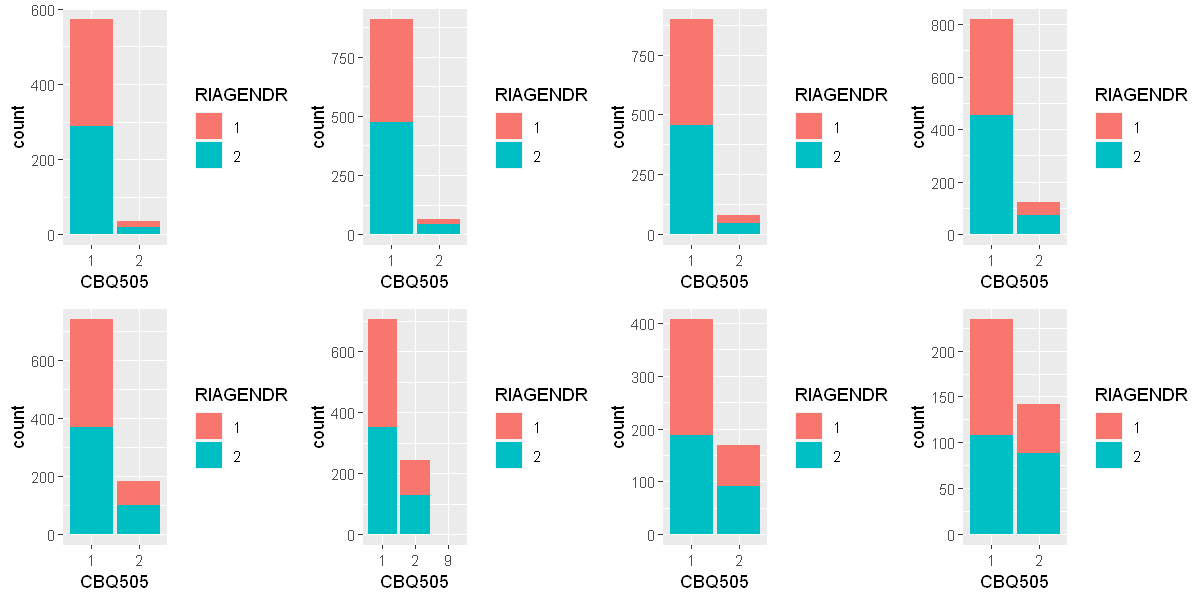

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

temp = subset(demo_dbq, !is.na(CBQ505)) #drop main var's na
demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

temp2 = temp

demo_age_0 = subset(temp2, temp2['Age_cate'] == "0")
demo_age_1 = subset(temp2, temp2['Age_cate'] == "1")
demo_age_2 = subset(temp2, temp2['Age_cate'] == "2")
demo_age_3 = subset(temp2, temp2['Age_cate'] == "3")
demo_age_4 = subset(temp2, temp2['Age_cate'] == "4")
demo_age_5 = subset(temp2, temp2['Age_cate'] == "5")
demo_age_6 = subset(temp2, temp2['Age_cate'] == "6")
demo_age_7 = subset(temp2, temp2['Age_cate'] == "7")
demo_age_8 = subset(temp2, temp2['Age_cate'] == "8")

p1 <- ggplot(demo_age_1, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p2 <- ggplot(demo_age_2, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p3 <- ggplot(demo_age_3, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p4 <- ggplot(demo_age_4, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p5 <- ggplot(demo_age_5, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p6 <- ggplot(demo_age_6, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p7 <- ggplot(demo_age_7, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
p8 <- ggplot(demo_age_8, aes(x= CBQ505, fill = RIAGENDR)) + geom_bar()
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8, nrow=2)

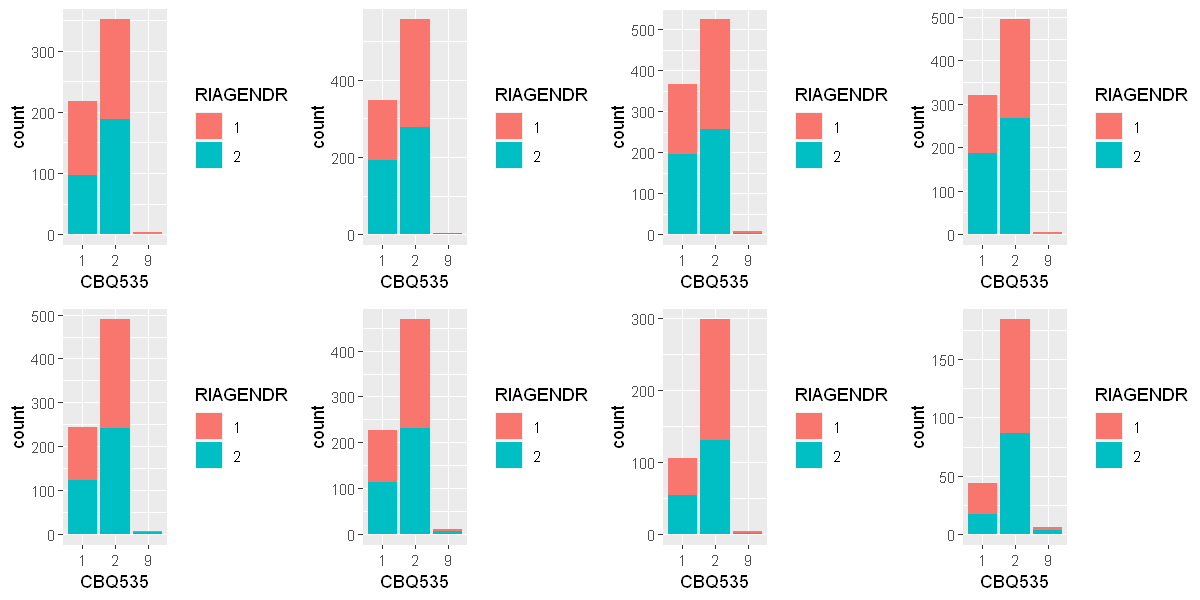

In [ ]:
#DBQ - CBQ535 / 505기준 yes로 필터링해서 먹었음에도 인식차이
options(repr.plot.width=10, repr.plot.height=5)

temp = subset(demo_dbq, !is.na(CBQ505)) #drop main var's na
temp = subset(temp, temp['CBQ505']== "1")
demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

temp2 = temp

demo_age_0 = subset(temp2, temp2['Age_cate'] == "0")
demo_age_1 = subset(temp2, temp2['Age_cate'] == "1")
demo_age_2 = subset(temp2, temp2['Age_cate'] == "2")
demo_age_3 = subset(temp2, temp2['Age_cate'] == "3")
demo_age_4 = subset(temp2, temp2['Age_cate'] == "4")
demo_age_5 = subset(temp2, temp2['Age_cate'] == "5")
demo_age_6 = subset(temp2, temp2['Age_cate'] == "6")
demo_age_7 = subset(temp2, temp2['Age_cate'] == "7")
demo_age_8 = subset(temp2, temp2['Age_cate'] == "8")

p1 <- ggplot(demo_age_1, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p2 <- ggplot(demo_age_2, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p3 <- ggplot(demo_age_3, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p4 <- ggplot(demo_age_4, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p5 <- ggplot(demo_age_5, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p6 <- ggplot(demo_age_6, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p7 <- ggplot(demo_age_7, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
p8 <- ggplot(demo_age_8, aes(x= CBQ535, fill = RIAGENDR)) + geom_bar()
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8, nrow=2)

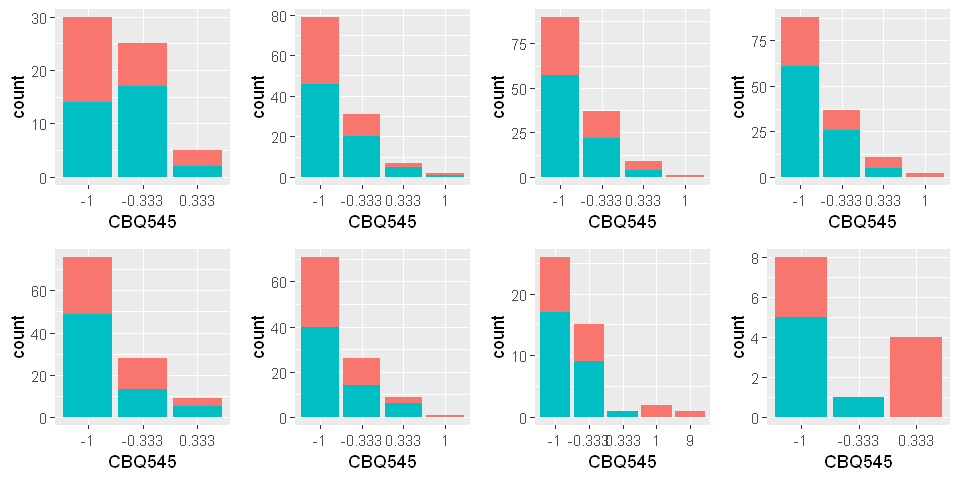

In [ ]:
#DBQ - CBQ545 / 540기준 yes로 필터링해서 먹었음에도 인식차이
#CBQ 545 likert로 되어있는데 왜 num이지
options(repr.plot.width=8, repr.plot.height=4)

temp = subset(demo_dbq, !is.na(CBQ505)) #drop main var's na
temp = subset(temp, temp['CBQ540']== "1")

names <- c('RIAGENDR' ,'Age_cate', 'CBQ505', 'CBQ535', 'CBQ540', 'CBQ545')
temp[,names] <- lapply(temp[,names] , factor)

demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

temp2 = temp

demo_age_0 = subset(temp2, temp2['Age_cate'] == "0")
demo_age_1 = subset(temp2, temp2['Age_cate'] == "1")
demo_age_2 = subset(temp2, temp2['Age_cate'] == "2")
demo_age_3 = subset(temp2, temp2['Age_cate'] == "3")
demo_age_4 = subset(temp2, temp2['Age_cate'] == "4")
demo_age_5 = subset(temp2, temp2['Age_cate'] == "5")
demo_age_6 = subset(temp2, temp2['Age_cate'] == "6")
demo_age_7 = subset(temp2, temp2['Age_cate'] == "7")
demo_age_8 = subset(temp2, temp2['Age_cate'] == "8")

p1 <- ggplot(demo_age_1, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p2 <- ggplot(demo_age_2, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p3 <- ggplot(demo_age_3, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p4 <- ggplot(demo_age_4, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p5 <- ggplot(demo_age_5, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p6 <- ggplot(demo_age_6, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p7 <- ggplot(demo_age_7, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)
p8 <- ggplot(demo_age_8, aes(x= CBQ545, fill = RIAGENDR)) + geom_bar(show.legend=FALSE)

grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8, nrow=2)

In [ ]:
str(demo_dbq)

'data.frame':	9971 obs. of  21 variables:
 $ SEQN    : int  83732 83733 83734 83735 83736 83737 83738 83739 83740 83741 ...
 $ RIAGENDR: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 1 1 1 ...
 $ RIDEXPRG: int  NA NA NA NA 1 NA NA NA NA NA ...
 $ RIDAGEYR: int  62 53 78 56 42 72 11 4 1 22 ...
 $ Age_cate: Factor w/ 9 levels "0","1","2","3",..: 7 6 8 6 5 8 2 1 1 3 ...
 $ DBQ700  : num  0 -1 0.5 0.5 1 0 NA NA NA 0 ...
 $ DBD895  : num  0.333 0 1.333 1 1 ...
 $ DBD900  : num  0 NA 1.333 0.333 0.333 ...
 $ DBD905  : num  0.156 0 0 0.856 0.233 0 0 0.078 0 0 ...
 $ DBD910  : num  0 0 0 1.167 0.078 ...
 $ CBQ596  : int  2 2 2 2 1 2 NA NA NA 2 ...
 $ CBQ606  : int  NA NA NA NA 2 NA NA NA NA NA ...
 $ CBQ611  : int  NA NA NA NA 1 NA NA NA NA NA ...
 $ CBQ505  : Factor w/ 3 levels "1","2","9": 1 2 1 1 1 2 NA NA NA 1 ...
 $ CBQ535  : Factor w/ 3 levels "1","2","9": 2 NA 2 1 1 NA NA NA NA 2 ...
 $ CBQ540  : Factor w/ 2 levels "1","2": NA NA NA 1 2 NA NA NA NA NA ...
 $ CBQ545  : Factor w/ 5 levels "-1

In [ ]:
temp = subset(demo_dbq, !is.na(CBQ505)) #drop main var's na
temp = subset(temp, !is.na(CBQ550))

names <- c('RIAGENDR' ,'Age_cate', 
           'DBQ700', 'CBQ596', 'CBQ606', 'CBQ611',
           'CBQ505', 'CBQ535', 'CBQ540', 'CBQ545', 'CBQ550', 'CBQ585')
temp[,names] <- lapply(temp[,names] , factor)

In [ ]:
#DBQ -  Confusion matrix - 패스트푸드/레스토랑, 영양 확인/안확인
options(repr.plot.width=8, repr.plot.height=4)

temp = subset(temp, temp['CBQ505']== "1")
temp = subset(temp, temp['CBQ550']== "1")

demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

In [ ]:
temp %>% group_by(CBQ540) %>% filter(CBQ580 =="2") %>% summarise(counted = n())

Warning message:
"Factor `CBQ540` contains implicit NA, consider using `forcats::fct_explicit_na`"

CBQ540,counted
<fct>,<int>
1,358
2,609
NA,2405


In [ ]:
#DBQ - CBQ606, 611 My plate를 쓰는 사람이 영양정보를 더 확인할까?
options(repr.plot.width=8, repr.plot.height=4)

temp = subset(temp, temp['CBQ611']== "1")
temp = subset(temp, temp['CBQ505']== "1")
temp = subset(temp, temp['CBQ550']== "1")

demo_male = subset(temp, temp['RIAGENDR'] == "1")
demo_female = subset(temp, temp['RIAGENDR'] == "2")

In [ ]:
temp %>% group_by(CBQ540) %>% filter(CBQ580 =="2") %>% summarise(counted = n())

Warning message:
"Factor `CBQ540` contains implicit NA, consider using `forcats::fct_explicit_na`"

CBQ540,counted
<fct>,<int>
1,63
2,35
NA,129


In [ ]:
#DBQ - CBQ606, 611 영양정보를 확인하면 외식을 덜할까?

In [ ]:
#주관적 식습관과 외식 횟수의 상관 - 없다

In [ ]:
# DBD895 - Not home prep DBD900 - fastfood DBD905 RtE food DBD910 _ frozen DBQ700

In [ ]:
str(demo_dbq)

'data.frame':	9971 obs. of  21 variables:
 $ SEQN    : int  83732 83733 83734 83735 83736 83737 83738 83739 83740 83741 ...
 $ RIAGENDR: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 1 1 1 ...
 $ RIDEXPRG: int  NA NA NA NA 1 NA NA NA NA NA ...
 $ RIDAGEYR: int  62 53 78 56 42 72 11 4 1 22 ...
 $ Age_cate: Factor w/ 9 levels "0","1","2","3",..: 7 6 8 6 5 8 2 1 1 3 ...
 $ DBQ700  : num  0 -1 0.5 0.5 1 0 NA NA NA 0 ...
 $ DBD895  : num  0.333 0 1.333 1 1 ...
 $ DBD900  : num  0 NA 1.333 0.333 0.333 ...
 $ DBD905  : num  0.156 0 0 0.856 0.233 0 0 0.078 0 0 ...
 $ DBD910  : num  0 0 0 1.167 0.078 ...
 $ CBQ596  : int  2 2 2 2 1 2 NA NA NA 2 ...
 $ CBQ606  : int  NA NA NA NA 2 NA NA NA NA NA ...
 $ CBQ611  : int  NA NA NA NA 1 NA NA NA NA NA ...
 $ CBQ505  : Factor w/ 3 levels "1","2","9": 1 2 1 1 1 2 NA NA NA 1 ...
 $ CBQ535  : Factor w/ 3 levels "1","2","9": 2 NA 2 1 1 NA NA NA NA 2 ...
 $ CBQ540  : Factor w/ 2 levels "1","2": NA NA NA 1 2 NA NA NA NA NA ...
 $ CBQ545  : Factor w/ 5 levels "-1

In [ ]:
names <- c('RIAGENDR','Age_cate','DBQ700','DBD895','DBD900','DBD905','DBD910')
temp <- subset(demo_dbq, select = names)
temp_male <- subset(temp, temp['RIAGENDR']=='1')
temp_male <- subset(temp_male, select = -c(RIAGENDR,Age_cate))
temp_female <- subset(temp, temp['RIAGENDR']=='2')
temp_female <- subset(temp_female, select = -c(RIAGENDR,Age_cate))

temp_male <- na.omit(temp_male)
temp_female <- na.omit(temp_female)
temp <- subset(temp, select = -c(RIAGENDR,Age_cate))
temp <- na.omit(temp)

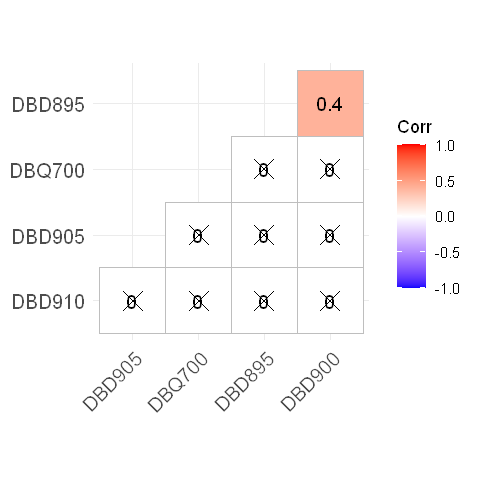

In [ ]:
x <- temp
corr <- round(cor(x), 1)
p.mat <- cor_pmat(x)

ggcorrplot(corr, hc.order = TRUE,
    type = "lower", p.mat = p.mat, lab=TRUE)

In [ ]:
str(temp)

'data.frame':	5735 obs. of  16 variables:
 $ SEQN    : int  83732 83733 83734 83735 83736 83737 83741 83742 83743 83744 ...
 $ RIAGENDR: int  1 1 1 2 2 2 1 2 1 1 ...
 $ RIDEXPRG: int  NA NA NA NA 1 NA NA 2 NA NA ...
 $ RIDAGEYR: int  62 53 78 56 42 72 22 32 18 56 ...
 $ Age_cate: int  6 5 7 5 4 7 2 3 1 5 ...
 $ DPQ010  : num  0.333 0.333 0.333 0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ020  : num  0.333 0.333 0.333 0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ030  : num  0.333 0.333 0.333 -0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ040  : num  0.333 0.333 0.333 -0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ050  : num  0.333 0.333 0.333 0.333 -1 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ060  : num  0.333 0.333 0.333 -1 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ070  : num  0.333 0.333 0.333 -0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ080  : num  0.333 0.333 0.333 0.333 0.333 0.333 0.333 0.333 NA 0.333 ...
 $ DPQ090  : num  0.333 0.333 0.333 0.333 0.333 0.333 0.333 0

Warning message:
"Removed 315 rows containing non-finite values (stat_boxplot)."

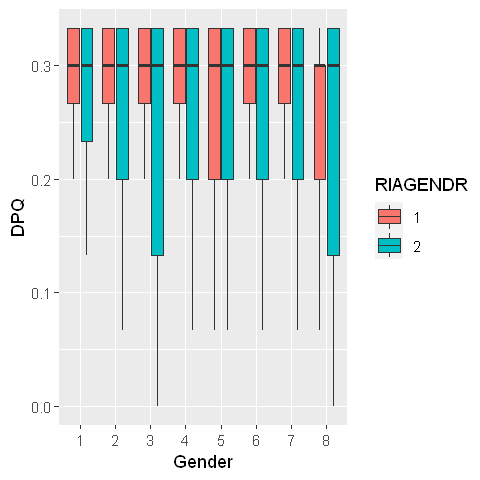

In [ ]:
#DPQ 총합해서 어느군이 가장 우울한지
options(repr.plot.width=4, repr.plot.height=4)

names <- c('RIAGENDR','Age_cate')
temp[,names] <- lapply(temp[,names] , factor)

temp = subset(temp, !is.na(total)) #drop main var's na

p <- ggplot(temp, aes(x = Age_cate, y= total, fill= RIAGENDR)) + 
geom_boxplot(outlier.shape = NA) +
labs(x="Gender", y="DPQ") + scale_y_continuous(limits = quantile(temp$total, c(0.1, 0.9)))

p

In [ ]:
#DPQ 어느군이 어떤 질문에서 가장 높은지

In [ ]:
#SLQ - SLQ 300, 310 그룹간 기상시간 비교

In [ ]:
#SLQ SLD012 그룹별 평균 수면시간

In [ ]:
#SLQ SLQ 030, 040, 050 그룹별 수면 문제

In [ ]:
#SLQ SLQ120 - 수면시간, 수면 문제와 비교해서 상관관계

In [ ]:
#PAQ PAQ610, 615 직장에서 얼마나 격렬한 운동을 하는가

In [ ]:
#PAQ PAQ635 640 645 출퇴근 중에 운동

In [ ]:
#PAQ PAQ650 655 660 개인 취미운동(격렬함)

In [ ]:
#PAQ PAQ665 670 PAD675 개인 취미운동(적당함)

In [ ]:
#PAQ PAD680 PAQ710 앉아있는 시간, 며칠정도 앉아있나, 

In [ ]:
#WHQ 030, 040 살빼려는 의지와 값과 DBQ700 주관적 식습관 인식 비교

In [ ]:
#WHQ 030, 040 살빼려는 의지와 값과 PAQ 655 660 격렬한 운동,  PAQ665 670 PAD675 적당한 운동 비교

In [ ]:
#WHD080 A~U까지 어떤 유형인지 비교해서 각 그룹별로 어떤 유형이 가장 많은지 비교